Name: Ahmed Ameen Uddin

Role: Data Analyst Intern

Project: Amazon Sales Analysis

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
data = pd.read_csv('/content/AmazonSalesData.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
# Checking the Null Values
data.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
# Conver order date to date time
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [ ]:
# Extracting month and year from order date
data["Year"]= data["Order Date"].dt.year
data["Month"]= data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [ ]:
# Calculating the Item Types
item_type = data["Item Type"].nunique()
print("Number of Item Types:", item_type)

Number of Item Types: 12


In [ ]:
# Calculating the Number of Regions
country = data["Country"].nunique()
print("Number of Countries:", country)

Number of Countries: 76


In [ ]:
# Calculating the Total Unit Sold
unit_sold = data["Units Sold"].sum()
print("Total Unit Sold:", unit_sold)

Total Unit Sold: 512871


In [ ]:
# Calculating the Total Unit Cost
unit_cost = data["Unit Cost"].sum()
print("Total Unit cost:", unit_cost)

Total Unit cost: 19104.8


In [ ]:
# Calculating the Total Revenue
total_revenue = data["Total Revenue"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 137348768.31


In [ ]:
# Calculating the Total Profit
total_profit = data["Total Profit"].sum()
print("Total Profit:", total_profit)

Total Profit: 44168198.39999999


In [ ]:
# Calculating the Total Cost
total_cost = data["Total Cost"].sum()
print("Total Cost:", total_cost)

Total Cost: 93180569.91000001


In [ ]:
# Calculating Total Profit Grouped by Region and Sales Channel
profit_by_region_channel = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().sort_values(ascending=False)
print(profit_by_region_channel)

Region                             Sales Channel
Sub-Saharan Africa                 Offline          7772777.78
Europe                             Offline          5574539.91
                                   Online           5508398.72
Sub-Saharan Africa                 Online           4410433.62
Middle East and North Africa       Online           3592110.78
Asia                               Offline          3584286.33
Australia and Oceania              Online           2835876.21
Asia                               Online           2529559.54
Central America and the Caribbean  Offline          2475814.99
Middle East and North Africa       Offline          2169081.08
Australia and Oceania              Offline          1886283.82
North America                      Offline          1457942.76
Central America and the Caribbean  Online            371092.86
Name: Total Profit, dtype: float64


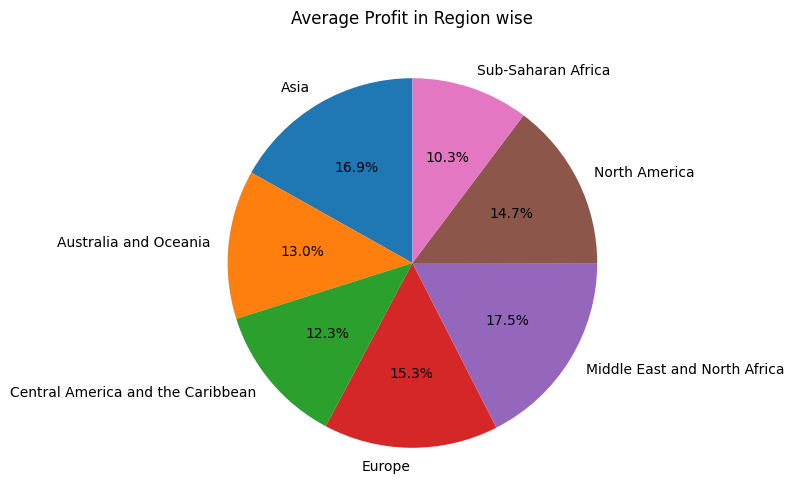

In [ ]:
# Pie chart of Total Profit in region wise
plt.figure(figsize=(6, 6))

region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue, startangle=90, labels=region_TotalRevenue.index, autopct='%1.1f%%')

plt.title('Average Profit in Region wise')
plt.show()

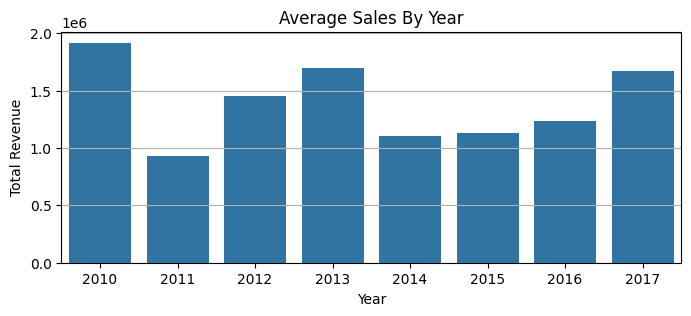

In [ ]:
# Year wise sales
year_sales = data.groupby('Year')['Total Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index, y=year_sales.values)
plt.grid(axis='y')

plt.title('Average Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

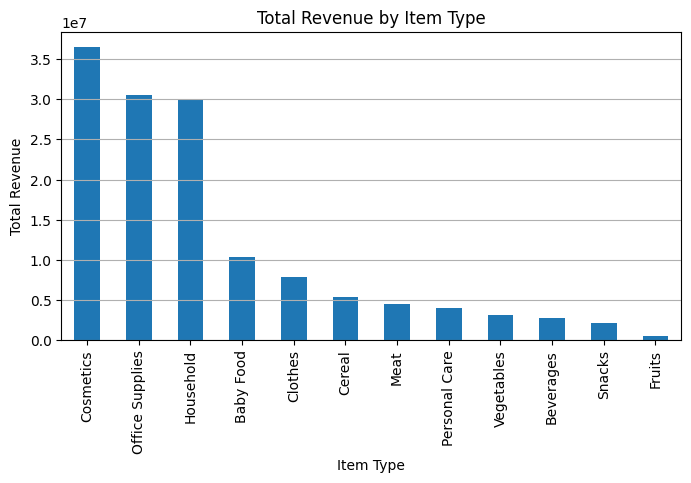

In [ ]:
# Group Total Revenue by Item type
TotalRevenue_ItemType = data.groupby('Item Type') ['Total Revenue'].sum()

# Bar chart for Total Revenue by Item type
plt.figure(figsize=(8,4))
TotalRevenue_ItemType.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Item Type')
plt.grid(axis='y')
plt.show()

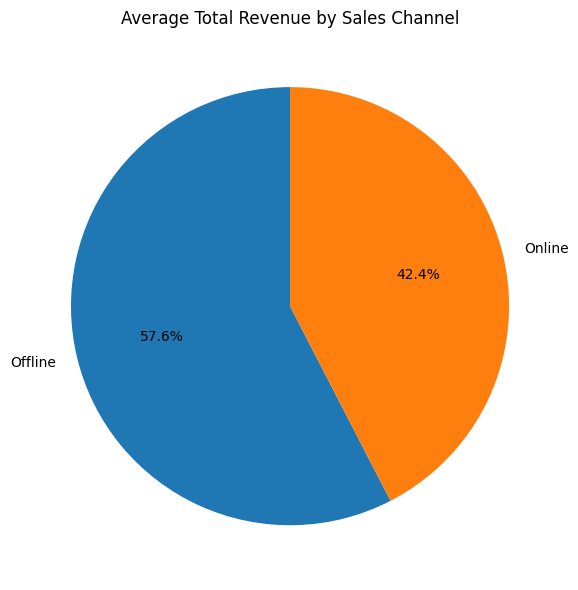

In [ ]:
# Group Total Revenue by Sales Channel and calculate the mean
TotalRevenue_by_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()

# Create Pie Chart for Total Revenue by Sales Channel
plt.figure(figsize=(6, 6))
plt.pie(TotalRevenue_by_SalesChannel, labels=TotalRevenue_by_SalesChannel.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Total Revenue by Sales Channel')
plt.tight_layout()
plt.show()

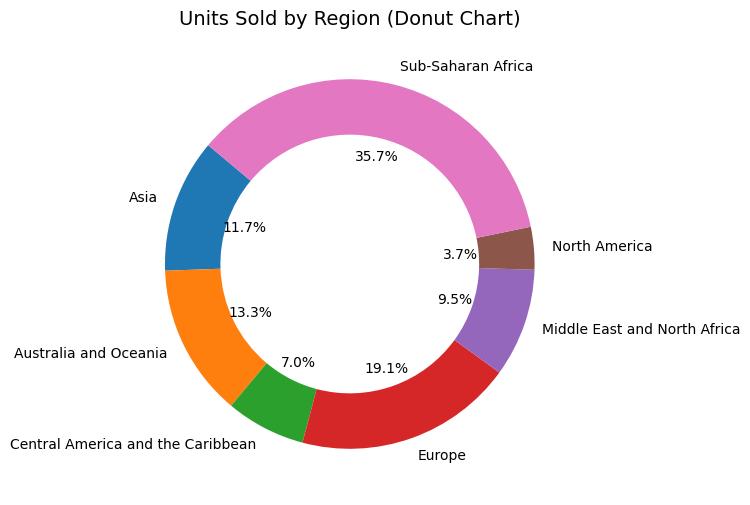

In [ ]:
# Create a Donut Chart of Units Sold by Region
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 6))
plt.pie(Region_UnitSold, labels=Region_UnitSold.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))  # Donut chart

plt.title('Units Sold by Region (Donut Chart)', fontsize=14)
plt.show()

In [ ]:
# Group unit sold by year and month
UnitSold_YearMonth= data.groupby(['Year','Month'])['Units Sold'].sum().sort_values(ascending=False)

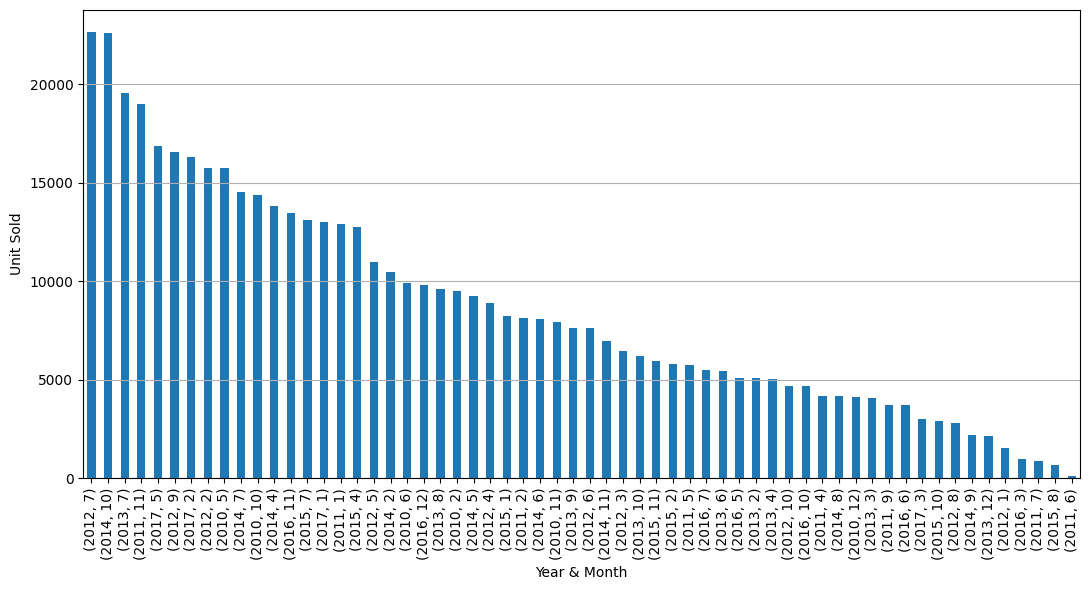

In [ ]:
# Creating a bar chart for unit sold by year and month
plt.figure(figsize=(11,6))
UnitSold_YearMonth.plot(kind='bar')
plt.xlabel('Year & Month')
plt.ylabel('Unit Sold')
plt.tight_layout()
plt.grid(axis='y')

In [ ]:
# Group total cost by sales chanel
TotalCost_SalesChannel= data.groupby('Sales Channel')['Total Cost'].sum()

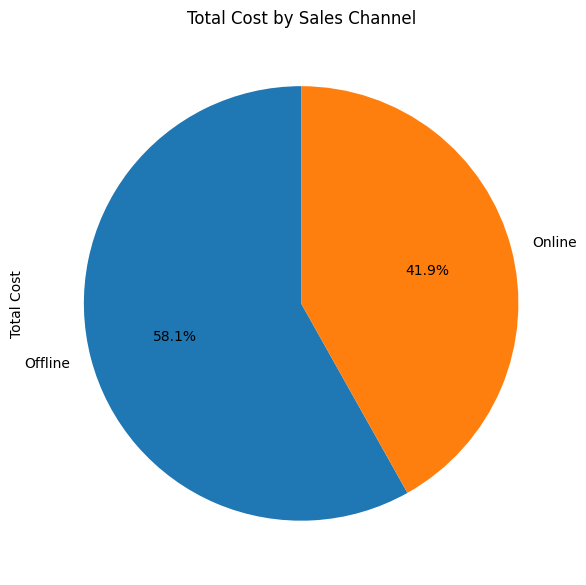

In [ ]:
# Creating a Pie chart for total cost by sales channel
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total Cost by Sales Channel')
plt.tight_layout()

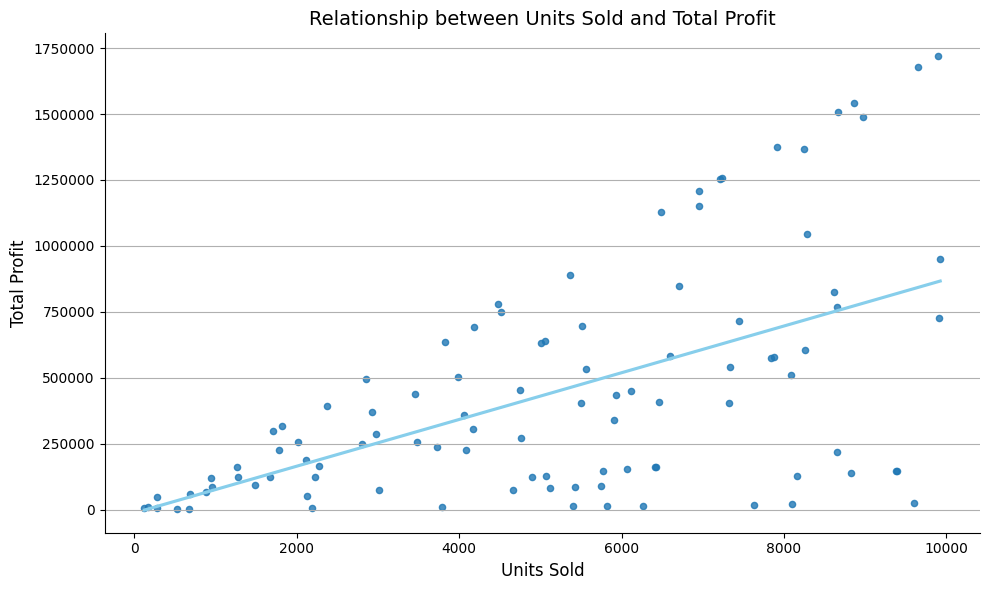

In [ ]:
# Creating a Scatter Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Units Sold', y='Total Profit',data=data, ci=None, scatter_kws={'s': 20}, line_kws={'color':'skyblue'})

# Customization (replicate the dark theme)
plt.title('Relationship between Units Sold and Total Profit', fontsize=14)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(axis='y')

# Tick Formatting (adjust if your profit values are different)
plt.ticklabel_format(style='plain', axis='y')

# Remove top and right spines for a cleaner look
sns.despine()



plt.tight_layout()
plt.show()

In [ ]:
# Adding DataFrame and has columns 'Total Profit' and 'Total Revenue'
Profit_Margin = (data['Total Profit'] / data['Total Revenue']) * 100

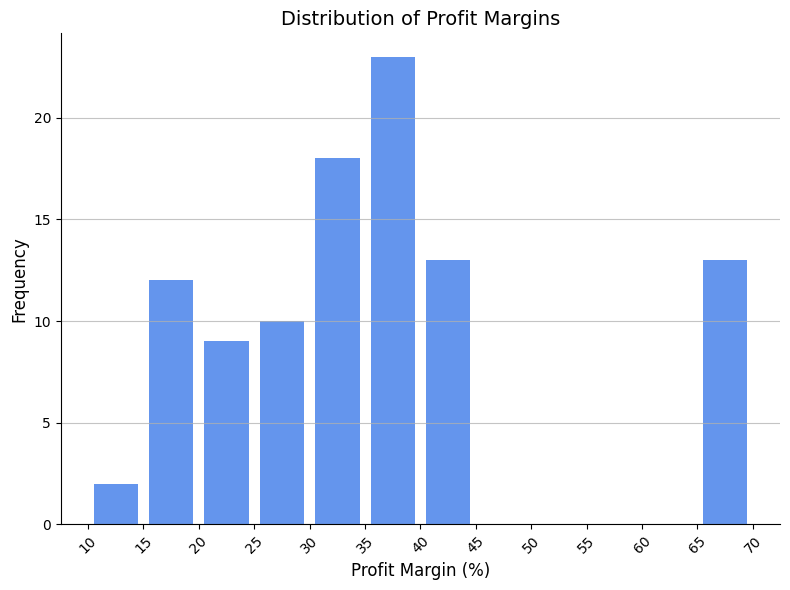

In [ ]:
# Creating a Histogram
plt.figure(figsize=(8, 6))


plt.hist(Profit_Margin, bins=range(10, 71, 5), rwidth=0.8, color='cornflowerblue')

# Customization
plt.title('Distribution of Profit Margins', fontsize=14)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(10, 71, 5), rotation=45)
plt.grid(axis='y', alpha=0.75)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.show()

